In [17]:
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [18]:
# Data 
df = pd.read_csv('../heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
# Data Preperation
y=df['target']
x = df.drop(['target'], axis=1)
X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.9)

In [133]:
# Model SVC

def svc_model(X_train, y_train,y_test):

    svc = SVC()

    svc.fit(X_train, y_train)

    predictions = svc.predict(x_test)

    correct = (y_test == predictions).sum()
    incorrect = (y_test != predictions).sum()
    total = len(predictions)

#     print("Correct", correct)
#     print("Incorrect", incorrect)
#     print("Total", total)
#     print("Accuracy", round(correct/total*100, 2))
    
    return round(correct/total*100, 2)

In [134]:
# Model linear SVC
def lsvc_model(X_train, y_train,y_test):
    linear = LinearSVC()

    linear.fit(X_train, y_train)

    predictions = linear.predict(x_test)

    correct = (y_test == predictions).sum()
    incorrect = (y_test != predictions).sum()
    total = len(predictions)

#     print("Correct", correct)
#     print("Incorrect", incorrect)
#     print("Total", total)
#     print("Accuracy", round(correct/total*100, 2))
    
    return round(correct/total*100, 2)

In [135]:
# Model Decision Tree Clasifiers
def dtc_model(X_train, y_train,y_test):
    dtc = DecisionTreeClassifier()

    dtc.fit(X_train, y_train)

    predictions = dtc.predict(x_test)

    correct = (y_test == predictions).sum()
    incorrect = (y_test != predictions).sum()
    total = len(predictions)

#     print("Correct", correct)
#     print("Incorrect", incorrect)
#     print("Total", total)
#     print("Accuracy", round(correct/total*100, 2))
    return round(correct/total*100, 2)

In [136]:
# Model Random Forest Clasifiers
def rfc_model(X_train, y_train,y_test):
    rfc = RandomForestClassifier()

    rfc.fit(X_train, y_train)

    predictions = rfc.predict(x_test)

    correct = (y_test == predictions).sum()
    incorrect = (y_test != predictions).sum()
    total = len(predictions)

#     print("Correct", correct)
#     print("Incorrect", incorrect)
#     print("Total", total)
#     print("Accuracy", round(correct/total*100, 2))
    return round(correct/total*100, 2)

In [137]:
# Model Logistic Regression
def lr_model(X_train, y_train,y_test):
    lr = LogisticRegression()

    lr.fit(X_train, y_train)

    predictions = lr.predict(x_test)

    correct = (y_test == predictions).sum()
    incorrect = (y_test != predictions).sum()
    total = len(predictions)

#     print("Correct", correct)
#     print("Incorrect", incorrect)
#     print("Total", total)
#     print("Accuracy", round(correct/total*100, 2))
    return round(correct/total*100, 2)

In [138]:
# Model Naïve Bayes classifier
def nmc_model(X_train, y_train,y_test):
    nbc = GaussianNB()

    nbc.fit(X_train, y_train)

    predictions = nbc.predict(x_test)

    correct = (y_test == predictions).sum()
    incorrect = (y_test != predictions).sum()
    total = len(predictions)

#     print("Correct", correct)
#     print("Incorrect", incorrect)
#     print("Total", total)
#     print("Accuracy", round(correct/total*100, 2))
    return round(correct/total*100, 2)

In [139]:
# Model Naïve Bayes classifier
def nbc_model(X_train, y_train,y_test):
    knn = KNeighborsClassifier()

    knn.fit(X_train, y_train)

    predictions = knn.predict(x_test)

    correct = (y_test == predictions).sum()
    incorrect = (y_test != predictions).sum()
    total = len(predictions)

#     print("Correct", correct)
#     print("Incorrect", incorrect)
#     print("Total", total)
#     print("Accuracy", round(correct/total*100, 2))
    return round(correct/total*100, 2)

In [174]:
import warnings
warnings.filterwarnings('ignore')

def all_models(x,y,y_):
    # Data Preperation, shuffle data
    y=df['target']
    x = df.drop(['target'], axis=1)
    X_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
    
    return {"nbc":nbc_model(x,y,y_), 'nmc':nmc_model(x,y,y_),\
            'lr':lr_model(x,y,y_), 'rfc':rfc_model(x,y,y_), \
            'dtc':dtc_model(x,y,y_), 'lsvc':lsvc_model(x,y,y_),\
            'svc':svc_model(x,y,y_)}
result = [ all_models(X_train, y_train,y_test) for i in range(20) ]

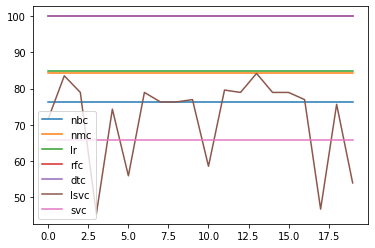

In [175]:
# 
import matplotlib.pyplot as plt
final = {"nbc":[], 'nmc':[], 'lr':[], 'rfc':[], 'dtc':[], 'lsvc':[], 'svc':[]}
group  = [ [final[k].append(j[k]) for k in j ] for j in result ]
df_check = pd.DataFrame(final)


for model in final:
    plt.plot(list(range(20)), df_check[model], label=model)
plt.legend()


In [182]:
averages = [  { i: str(round( sum(final[i])/len(final[i]) , 2))+ " %"} for i in final]
averages

[{'nbc': '76.32 %'},
 {'nmc': '84.21 %'},
 {'lr': '84.87 %'},
 {'rfc': '100.0 %'},
 {'dtc': '100.0 %'},
 {'lsvc': '71.55 %'},
 {'svc': '65.79 %'}]

In [ ]:
# lr Logicsts regression is good. there are cases show us 100%, but not trustble. 